<h2>1. Contexte<h2/>

<h2>This notebook is dedicated to understanding the subject and exploring the data.<h2/>

<h3>"The dataset includes 174 metrics and 297,099 rows of data of tropical storms in the United States
collected from 1980 onwards. The data is raw, imperfect, and has not been cleaned or preprocessed."<h3/>

<h3>"Information about the dataset attributes can be found in the IBTRACS_variable_documentation file. Using the provided dataset, you are asked to train a model to predict the severity of a tropical cyclone based on geographical input data."<h3/>

We want to predict the 145th column of the dataset

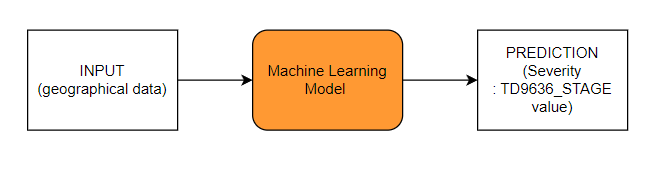

<h2>2. Data Exploration<h2/>

In [5]:
#Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
import seaborn as sns

In [6]:
#Import and read the csv file, forcing the NaN values in case of formating issues. Display the 5 first rows

df = pd.read_csv("ibtracs.csv",low_memory=False, na_values=["", " ", "-", "NA", "N/A"],dtype=str) # to correct the formating issue when importing the csv
df.head(5)

SID SEASON NUMBER BASIN SUBBASIN  NAME             ISO_TIME  \
0            NaN   Year    NaN   NaN      NaN   NaN                  NaN   
1  1980001S13173   1980      1    SP       MM  PENI  1980-01-01 00:00:00   
2  1980001S13173   1980      1    SP       MM  PENI  1980-01-01 03:00:00   
3  1980001S13173   1980      1    SP       MM  PENI  1980-01-01 06:00:00   
4  1980001S13173   1980      1    SP       MM  PENI  1980-01-01 09:00:00   

  NATURE            LAT           LON  ... BOM_GUST_PER REUNION_GUST  \
0    NaN  degrees_north  degrees_east  ...       second          kts   
1     TS          -12.5         172.5  ...          NaN          NaN   
2     TS          -12.2         172.4  ...          NaN          NaN   
3     TS          -11.9         172.4  ...          NaN          NaN   
4     TS          -11.7         172.4  ...          NaN          NaN   

  REUNION_GUST_PER USA_SEAHGT USA_SEARAD_NE USA_SEARAD_SE USA_SEARAD_SW  \
0           second         ft         nmile         nmile         nmile   
1              NaN        NaN           NaN           NaN           NaN   
2              NaN        NaN           NaN           NaN           NaN   
3              NaN        NaN           NaN           NaN           NaN   
4              NaN        NaN           NaN           NaN           NaN   

  USA_SEARAD_NW STORM_SPEED STORM_DIR  
0         nmile         kts   degrees  
1           NaN           6       350  
2           NaN           6       350  
3           NaN           5       360  
4           NaN           4        10  

[5 rows x 174 columns]

We notice that the first row, that gives units of certain columns, will be an issue and should not stay in our dataset. We delete this row. 

In [7]:
df=df.drop(index=0)
df.head(5)

SID SEASON NUMBER BASIN SUBBASIN  NAME             ISO_TIME  \
1  1980001S13173   1980      1    SP       MM  PENI  1980-01-01 00:00:00   
2  1980001S13173   1980      1    SP       MM  PENI  1980-01-01 03:00:00   
3  1980001S13173   1980      1    SP       MM  PENI  1980-01-01 06:00:00   
4  1980001S13173   1980      1    SP       MM  PENI  1980-01-01 09:00:00   
5  1980001S13173   1980      1    SP       MM  PENI  1980-01-01 12:00:00   

  NATURE    LAT    LON  ... BOM_GUST_PER REUNION_GUST REUNION_GUST_PER  \
1     TS  -12.5  172.5  ...          NaN          NaN              NaN   
2     TS  -12.2  172.4  ...          NaN          NaN              NaN   
3     TS  -11.9  172.4  ...          NaN          NaN              NaN   
4     TS  -11.7  172.4  ...          NaN          NaN              NaN   
5     TS  -11.5  172.5  ...          NaN          NaN              NaN   

  USA_SEAHGT USA_SEARAD_NE USA_SEARAD_SE USA_SEARAD_SW USA_SEARAD_NW  \
1        NaN           NaN           NaN           NaN           NaN   
2        NaN           NaN           NaN           NaN           NaN   
3        NaN           NaN           NaN           NaN           NaN   
4        NaN           NaN           NaN           NaN           NaN   
5        NaN           NaN           NaN           NaN           NaN   

  STORM_SPEED STORM_DIR  
1           6       350  
2           6       350  
3           5       360  
4           4        10  
5           4        20  

[5 rows x 174 columns]

In [8]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])  # Convert to int ou float if possible
    except ValueError:
        pass  # Ignore errors

print(df.dtypes)

SID               object
SEASON             int64
NUMBER             int64
BASIN             object
SUBBASIN          object
                  ...   
USA_SEARAD_SE    float64
USA_SEARAD_SW    float64
USA_SEARAD_NW    float64
STORM_SPEED      float64
STORM_DIR        float64
Length: 174, dtype: object


In [9]:
# We highlight the columns that will be challenging, here the ones with NaN
df.isna().sum()

SID                   0
SEASON                0
NUMBER                0
BASIN             40518
SUBBASIN          32646
                  ...  
USA_SEARAD_SE    282038
USA_SEARAD_SW    283730
USA_SEARAD_NW    282124
STORM_SPEED           8
STORM_DIR             8
Length: 174, dtype: int64

In [10]:
# We count the number of NaN per columns to estimate the percentage of the df it represents
missing_values=df.isna().sum()
columns_with_missing = missing_values[missing_values >= 0]

# disable the display limit
pd.set_option("display.max_rows", None)

total_rows = len(df)
missing_percentage = (columns_with_missing / total_rows) * 100

print(missing_percentage.sort_values(ascending=False).to_frame(name="Missing Values Percentage"))

# reinitialize the configuration
pd.reset_option("display.max_rows")

                  Missing Values Percentage
MLC_LAT                          100.000000
TD9635_ROCI                      100.000000
REUNION_GUST                     100.000000
MLC_CLASS                        100.000000
MLC_WIND                         100.000000
MLC_PRES                         100.000000
TD9636_PRES                      100.000000
TD9635_LAT                       100.000000
TD9635_LON                       100.000000
TD9635_WIND                      100.000000
REUNION_R64_NW                   100.000000
REUNION_R64_NE                   100.000000
REUNION_R64_SW                   100.000000
REUNION_R64_SE                   100.000000
MLC_LON                          100.000000
TD9635_PRES                      100.000000
BOM_R64_NW                        99.806125
BOM_R64_SW                        99.800403
BOM_R64_SE                        99.795354
BOM_R64_NE                        99.792324
USA_RECORD                        99.754963
DS824_PRES                      

#### Now, we have a first look at the columns and especially a more detailed vue of the ones with the most of missing values and the one without missing values. As we see by that and by looking directly at the csv file,a lot of columns have a high percentage of missing values:  **151/174 columns have more than 50% of missing values, and 16/174 columns have no values at all**
#### We first decide to delete the columns that don't contain values, since they don't add anything.

In [11]:
empty_columns=missing_percentage[missing_percentage==100]
df_processed=df.drop(columns=empty_columns.index)
df_processed.shape

(297098, 158)

In [12]:
#type of KMA_CAT has been changed from object to int64 by the previous step, we correct it:
df_processed["KMA_CAT"] = df["KMA_CAT"]

#### Another important point to notice is that the target metric itself, TD9636_STAGE has 83,7% of missing values, so we can't just delete all the columns with "too many" missing values, we need to further our investigation.
#### And it means that there are 48343 rows with available value of TD9636_STAGE

In [13]:
df_processed.loc[df_processed.TD9636_STAGE.notna(),:]

SID  SEASON  NUMBER BASIN SUBBASIN  NAME  \
1      1980001S13173    1980       1    SP       MM  PENI   
2      1980001S13173    1980       1    SP       MM  PENI   
3      1980001S13173    1980       1    SP       MM  PENI   
4      1980001S13173    1980       1    SP       MM  PENI   
5      1980001S13173    1980       1    SP       MM  PENI   
...              ...     ...     ...   ...      ...   ...   
67406  1989354N05155    1989     129    WP       MM  JACK   
67407  1989354N05155    1989     129    WP       MM  JACK   
67408  1989354N05155    1989     129    WP       MM  JACK   
67409  1989354N05155    1989     129    WP       MM  JACK   
67410  1989354N05155    1989     129    WP       MM  JACK   

                  ISO_TIME NATURE   LAT    LON  ...  BOM_GUST  BOM_GUST_PER  \
1      1980-01-01 00:00:00     TS -12.5  172.5  ...       NaN           NaN   
2      1980-01-01 03:00:00     TS -12.2  172.4  ...       NaN           NaN   
3      1980-01-01 06:00:00     TS -11.9  172.4  ...       NaN           NaN   
4      1980-01-01 09:00:00     TS -11.7  172.4  ...       NaN           NaN   
5      1980-01-01 12:00:00     TS -11.5  172.5  ...       NaN           NaN   
...                    ...    ...   ...    ...  ...       ...           ...   
67406  1989-12-29 00:00:00     TS  14.6  141.6  ...       NaN           NaN   
67407  1989-12-29 03:00:00     TS  14.4  141.2  ...       NaN           NaN   
67408  1989-12-29 06:00:00     TS  14.3  140.8  ...       NaN           NaN   
67409  1989-12-29 09:00:00     TS  14.1  140.4  ...       NaN           NaN   
67410  1989-12-29 12:00:00     TS  14.0  140.0  ...       NaN           NaN   

      REUNION_GUST_PER USA_SEAHGT  USA_SEARAD_NE  USA_SEARAD_SE USA_SEARAD_SW  \
1                  NaN        NaN            NaN            NaN           NaN   
2                  NaN        NaN            NaN            NaN           NaN   
3                  NaN        NaN            NaN            NaN           NaN   
4                  NaN        NaN            NaN            NaN           NaN   
5                  NaN        NaN            NaN            NaN           NaN   
...                ...        ...            ...            ...           ...   
67406              NaN        NaN            NaN            NaN           NaN   
67407              NaN        NaN            NaN            NaN           NaN   
67408              NaN        NaN            NaN            NaN           NaN   
67409              NaN        NaN            NaN            NaN           NaN   
67410              NaN        NaN            NaN            NaN           NaN   

      USA_SEARAD_NW STORM_SPEED  STORM_DIR  
1               NaN         6.0      350.0  
2               NaN         6.0      350.0  
3               NaN         5.0      360.0  
4               NaN         4.0       10.0  
5               NaN         4.0       20.0  
...             ...         ...        ...  
67406           NaN         9.0      250.0  
67407           NaN         9.0      250.0  
67408           NaN         8.0      250.0  
67409           NaN         8.0      250.0  
67410           NaN         8.0      250.0  

[48343 rows x 158 columns]

### **Data Handling Options for `TD9636_STAGE`**

From now on, we have two main options:  

#### **Option 1: Keep only the rows where `TD9636_STAGE` is not missing**  
#### 📌 Advantages:  
- Ensures the model is trained only with complete data.  
- No need to handle missing target values.  
- Easier.  

#### 📌 Disadvantages:  
- We lose **83%** of the available data, which may limit model performance.  
- Risk of bias if the remaining data is not representative of the entire dataset.  


#### **Option 2: Attempt to impute `TD9636_STAGE` to retain more data**  
We could try predicting the missing values of `TD9636_STAGE` using other variables like latitude, longitude, pressure, wind, etc., before training the actual model.  

#### 📌 Advantages:  
- Uses more data, potentially improving model robustness.  
- Useful if the remaining data is biased (e.g., certain regions or years are overrepresented).  

#### 📌 Disadvantages:  
- Introduces uncertainty by predicting a variable that will later be used as the target.  
- If the imputation is poorly done, it may degrade the performance of the main model.  


---

## So let's analyse the remaining 48343 rows:
- If the remaining **48,343 rows** are sufficient and well-distributed, it's better to **drop rows with missing `TD9636_STAGE`** and train the model directly.  
- If analysis shows that the remaining data is too biased, then **smart imputation** should be considered. 


### Checking the temporal distribution:

In [14]:
df.SEASON.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025])

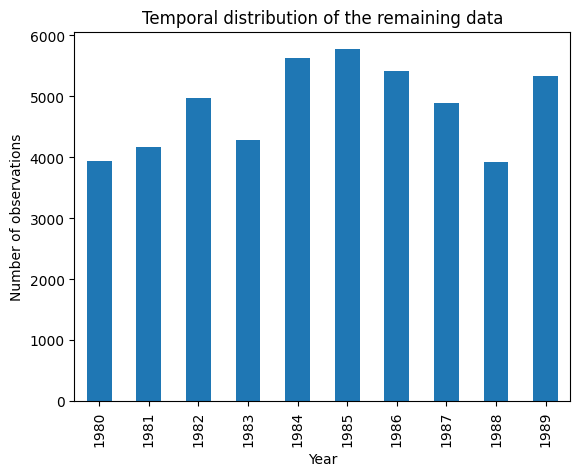

In [15]:
# filter rows where TD9636_STAGE not missing
df_remaining=df_processed.loc[df_processed.TD9636_STAGE.notna(),:]


# Visualization

df_remaining['SEASON'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of observations")
plt.title("Temporal distribution of the remaining data")
plt.show()

### We immediatly see that there are no datas after 1989, which means that we can't keep only these 48343 remaining rows, it would be **biased**.
By doing some research on the IBTRACS datas, we found that "The TD9636 dataset was constructed in the 1960s and 1970s by NOAA/National Climatic Center (now called NCEI). It represents a global collection of storms derived from multiple sources. It has not been updated since the 1980s.Data from TC 9636 is used in IBTrACS outside of the North Atlantic and before 1980."
**Which explains this lack of data after 1989.**

*Source :* [IBTrACS version4r01 Technical Details.pdf](https://www.ncei.noaa.gov/sites/g/files/anmtlf171/files/2024-06/IBTrACS%20version4r01%20Technical%20Details.pdf)

### We know that we have to impute TD9636_STAGE to retain more data, but for that we need to analyse the other metrics to have a good and precise imputation.

### So let's go back to analysing our columns:
### The particularity of this dataset is that the data comes from several geographical regions, so we need to adopt a clever approach to cleansing the database without deleting potentially useful columns. Some columns are region-specific. If you delete a column just because it has a lot of missing values overall, you run the risk of eliminating essential information for a region.


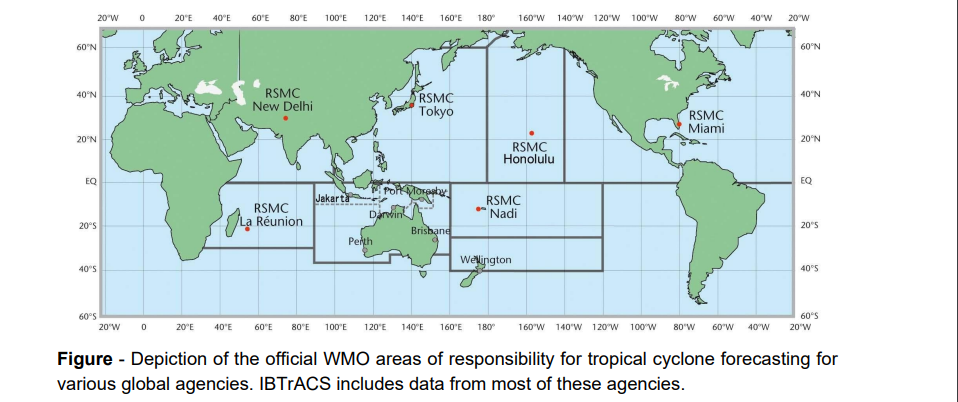

## We follow these steps:

*The strategy is to group datas by their region, check the missing values by region, delete the columns not informative and keep the important columns for each region.*

### 1.Checking the missing values by region

In [16]:
# List of columns by region
regions = {
    "USA": [col for col in df_processed.columns if col.startswith("USA_")],
    "Tokyo": [col for col in df_processed.columns if col.startswith("TOKYO_")],
    "CMA": [col for col in df_processed.columns if col.startswith("CMA_")],
    "HKO": [col for col in df_processed.columns if col.startswith("HKO_")],
    "KMA": [col for col in df_processed.columns if col.startswith("KMA_")],
    "NewDelhi": [col for col in df_processed.columns if col.startswith("NEWDELHI_")],
    "Reunion": [col for col in df_processed.columns if col.startswith("REUNION_")],
    "BoM": [col for col in df_processed.columns if col.startswith("BOM_")],
    "Wellington": [col for col in df_processed.columns if col.startswith("WELLINGTON_")],
    "Nadi": [col for col in df_processed.columns if col.startswith("NADI_")],
    "TD9636": [col for col in df_processed.columns if col.startswith(("TD9636_"))],
    "DS824": [col for col in df_processed.columns if col.startswith(("DS824_"))],
    "Neumann": [col for col in df_processed.columns if col.startswith(("NEUMANN_"))]
    
}

# Percentage of missing value by region
missing_by_region = {region: df_processed[cols].isna().mean().mean() * 100 for region, cols in regions.items()}

# display
missing_by_region_df = pd.DataFrame.from_dict(missing_by_region, orient="index", columns=["% de valeurs manquantes"])
print(missing_by_region_df.sort_values(by="% de valeurs manquantes", ascending=False))

            % de valeurs manquantes
DS824                     98.811032
Nadi                      97.495237
NewDelhi                  97.433843
KMA                       97.144621
BoM                       96.362355
Reunion                   95.370274
Wellington                94.159503
Neumann                   85.938175
TD9636                    84.631250
HKO                       80.795024
Tokyo                     80.742774
CMA                       75.150287
USA                       70.895668


we delete DS824 columns because there are a lot of missing value and it is not very relevant as "Data from ds824 is used for storms occurring between 1877
and 1980."

In [17]:
df_processed.shape

(297098, 158)

In [18]:
df_processed = df_processed.drop(columns=regions["DS824"])
df_processed.shape

(297098, 153)

### 2.Separate numerical and categorical columns


In [19]:
print(df_processed.dtypes)

SID               object
SEASON             int64
NUMBER             int64
BASIN             object
SUBBASIN          object
                  ...   
USA_SEARAD_SE    float64
USA_SEARAD_SW    float64
USA_SEARAD_NW    float64
STORM_SPEED      float64
STORM_DIR        float64
Length: 153, dtype: object


In [20]:
num_cols = df_processed.select_dtypes(include=['number']).columns.tolist()
cat_cols = df_processed.select_dtypes(exclude=['number']).columns.tolist()

print(f" Numerical columns : {len(num_cols)}")
print(f" Categorical columns, to encode : {len(cat_cols)}")


 Numerical columns : 136
 Categorical columns, to encode : 17


In [21]:
cat_cols

['SID',
 'BASIN',
 'SUBBASIN',
 'NAME',
 'ISO_TIME',
 'NATURE',
 'WMO_AGENCY',
 'TRACK_TYPE',
 'IFLAG',
 'USA_AGENCY',
 'USA_ATCF_ID',
 'USA_RECORD',
 'USA_STATUS',
 'HKO_CAT',
 'KMA_CAT',
 'NEWDELHI_GRADE',
 'NEUMANN_CLASS']

### 3. Encode categorical columns

In [22]:
df_le=df_processed.copy()

In [23]:
print(df_processed["KMA_CAT"].dtype)

object


In [24]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    df_le[col] = le.fit_transform(df_le[col])

In [25]:
df_le.loc[:,cat_cols]

SID  BASIN  SUBBASIN  NAME  ISO_TIME  NATURE  WMO_AGENCY  TRACK_TYPE  \
1          0      4         6  1233         0       5          10           2   
2          0      4         6  1233         1       5          10           2   
3          0      4         6  1233         2       5          10           2   
4          0      4         6  1233         3       5          10           2   
5          0      4         6  1233         4       5          10           2   
...      ...    ...       ...   ...       ...     ...         ...         ...   
297094  4766      5         6   118    117614       3          10           0   
297095  4766      5         6   118    117615       3          10           0   
297096  4766      5         6   118    117616       3          10           0   
297097  4766      5         6   118    117617       3          10           0   
297098  4766      5         6   118    117618       3          10           0   

        IFLAG  USA_AGENCY  USA_ATCF_ID  USA_RECORD  USA_STATUS  HKO_CAT  \
1         170           7         2015           9          17        7   
2         340          13         2015           9          17        7   
3         172           7         2015           9          17        7   
4         340          13         2015           9          17        7   
5         170           7         2015           9          17        7   
...       ...         ...          ...         ...         ...      ...   
297094    180          12         3962           9          17        7   
297095    349          13         3962           9          17        7   
297096    180          12         3962           9          17        7   
297097    349          13         3962           9          17        7   
297098    180          12         3962           9          17        7   

        KMA_CAT  NEWDELHI_GRADE  NEUMANN_CLASS  
1             5              10              2  
2             5              10              2  
3             5              10              2  
4             5              10              2  
5             5              10              2  
...         ...             ...            ...  
297094        5              10              3  
297095        5              10              3  
297096        5              10              3  
297097        5              10              3  
297098        5              10              3  

[297098 rows x 17 columns]

### 4. Calculate the correlation with TD9636_STAGE

In [26]:
# Correlation with TD9636_STAGE for each column
correlation_matrix = df_le.corr()
correlation_td9636 = correlation_matrix["TD9636_STAGE"].sort_values(ascending=False)


correlation_td9636



TD9636_STAGE     1.000000
TD9636_WIND      0.875176
USA_WIND         0.844250
REUNION_CI       0.790522
WMO_WIND         0.786579
                   ...   
USA_SEAHGT            NaN
USA_SEARAD_NE         NaN
USA_SEARAD_SE         NaN
USA_SEARAD_SW         NaN
USA_SEARAD_NW         NaN
Name: TD9636_STAGE, Length: 153, dtype: float64

#### *Identifyng `NaN`correlation values*

In [27]:
correlation_td9636.isna().sum()

np.int64(63)

In [28]:
nan_corr_cols = correlation_td9636[correlation_td9636.isna()].index.tolist()
print(f"Columns with NaN correlation: {nan_corr_cols}")

Columns with NaN correlation: ['USA_R34_NE', 'USA_R34_SE', 'USA_R34_SW', 'USA_R34_NW', 'USA_R50_NE', 'USA_R50_SE', 'USA_R50_SW', 'USA_R50_NW', 'USA_R64_NE', 'USA_R64_SE', 'USA_R64_SW', 'USA_R64_NW', 'USA_POCI', 'USA_ROCI', 'USA_RMW', 'USA_EYE', 'TOKYO_LAND', 'KMA_LAT', 'KMA_LON', 'KMA_CAT', 'KMA_WIND', 'KMA_PRES', 'KMA_R50_DIR', 'KMA_R50_LONG', 'KMA_R50_SHORT', 'KMA_R30_DIR', 'KMA_R30_LONG', 'KMA_R30_SHORT', 'NEWDELHI_POCI', 'REUNION_RMW', 'REUNION_R34_NE', 'REUNION_R34_SE', 'REUNION_R34_SW', 'REUNION_R34_NW', 'REUNION_R50_NE', 'REUNION_R50_SE', 'REUNION_R50_SW', 'REUNION_R50_NW', 'BOM_RMW', 'BOM_R34_NE', 'BOM_R34_SE', 'BOM_R34_SW', 'BOM_R34_NW', 'BOM_R50_NE', 'BOM_R50_SE', 'BOM_R50_SW', 'BOM_R50_NW', 'BOM_R64_NE', 'BOM_R64_SE', 'BOM_R64_SW', 'BOM_R64_NW', 'NADI_LAT', 'NADI_LON', 'NADI_CAT', 'NADI_WIND', 'NADI_PRES', 'USA_GUST', 'REUNION_GUST_PER', 'USA_SEAHGT', 'USA_SEARAD_NE', 'USA_SEARAD_SE', 'USA_SEARAD_SW', 'USA_SEARAD_NW']


#### *Looking for the cause of `NaN`correlation values*
When we calculate the correlation between TD9636_STAGE and certain columns, we obtain **63 NaN values**. The reasons for this are as follows:

→ If a column contains only one value, its variance is 0, and the correlation becomes NaN.

→ If a column contains too many NaNs, the correlation calculation may fail.

→ If some categorical columns have not been correctly transformed into numbers, correlation cannot be calculated.

In [29]:
for col in nan_corr_cols:
    if missing_percentage[col] > 0.9:
        print(f"📉 {col} Too many missing values")
        
    elif df_le[col].nunique() == 1:
        print(f"⚠️ Delete {col} (constant value)")
        
    elif df_le[col].dtype == 'object':
        print(f"🔄 Encoder {col}")
        
    else:
        print(f"🔎 Verify {col} (exception)")


📉 USA_R34_NE Too many missing values
📉 USA_R34_SE Too many missing values
📉 USA_R34_SW Too many missing values
📉 USA_R34_NW Too many missing values
📉 USA_R50_NE Too many missing values
📉 USA_R50_SE Too many missing values
📉 USA_R50_SW Too many missing values
📉 USA_R50_NW Too many missing values
📉 USA_R64_NE Too many missing values
📉 USA_R64_SE Too many missing values
📉 USA_R64_SW Too many missing values
📉 USA_R64_NW Too many missing values
📉 USA_POCI Too many missing values
📉 USA_ROCI Too many missing values
📉 USA_RMW Too many missing values
📉 USA_EYE Too many missing values
📉 TOKYO_LAND Too many missing values
📉 KMA_LAT Too many missing values
📉 KMA_LON Too many missing values
📉 KMA_CAT Too many missing values
📉 KMA_WIND Too many missing values
📉 KMA_PRES Too many missing values
📉 KMA_R50_DIR Too many missing values
📉 KMA_R50_LONG Too many missing values
📉 KMA_R50_SHORT Too many missing values
📉 KMA_R30_DIR Too many missing values
📉 KMA_R30_LONG Too many missing values
📉 KMA_R30_SHORT

**The reason of NaN correlation is too many missing values.**

#### *Dealing with `NaN`correlation values*
Just to be sure these 63 columns can be deleted or if we need to delete some rows to better estimate the correlation with TD9636_STAGE, we will keep the lines where td9636_stage is available and verify if then we can see a correlation.

In [30]:
df_no_nan_target = df_le.dropna(subset=['TD9636_STAGE'])
corr_matrix = df_no_nan_target.corr()["TD9636_STAGE"].sort_values(ascending=False)



corr_matrix


TD9636_STAGE     1.000000
TD9636_WIND      0.875176
USA_WIND         0.844250
REUNION_CI       0.790522
WMO_WIND         0.786579
                   ...   
USA_SEAHGT            NaN
USA_SEARAD_NE         NaN
USA_SEARAD_SE         NaN
USA_SEARAD_SW         NaN
USA_SEARAD_NW         NaN
Name: TD9636_STAGE, Length: 153, dtype: float64

In [31]:
corr_matrix.isna().sum()

np.int64(63)

### **There are no correlation with TD9636_STAGE, and more than 90% of missing values, we delete the columns with no correlation, except for the columns concerning Nadi because its the only ones in this area.**
(we loose all data from KMA but we assume that these areas is also covered by the remaining Tokyo datas)

In [32]:
cols_to_keep = ['NADI_LAT', 'NADI_LON', 'NADI_CAT', 'NADI_WIND', 'NADI_PRES']
nan_corr_cols_except_NADI = [col for col in nan_corr_cols if col not in cols_to_keep]

In [33]:
df_le.drop(columns=nan_corr_cols_except_NADI, inplace=True)

In [34]:
df_le.shape

(297098, 95)

In [39]:
new_correlation_matrix = df_le.corr()
new_correlation_td9636 = new_correlation_matrix["TD9636_STAGE"].sort_values(ascending=False)
pd.set_option("display.max_rows", None)
new_correlation_td9636

TD9636_STAGE       1.000000
TD9636_WIND        0.875176
USA_WIND           0.844250
REUNION_CI         0.790522
WMO_WIND           0.786579
HKO_WIND           0.767099
TOKYO_GRADE        0.767072
TOKYO_WIND         0.759042
REUNION_WIND       0.748998
CMA_WIND           0.743039
NEUMANN_WIND       0.726925
WELLINGTON_WIND    0.722563
CMA_CAT            0.698441
BOM_CI             0.696391
BOM_GUST_PER       0.670413
BOM_GUST           0.670413
TOKYO_R50_DIR      0.648343
BOM_WIND           0.647387
NEWDELHI_WIND      0.605552
USA_SSHS           0.604406
NEWDELHI_DP        0.581428
BOM_TYPE           0.572993
BOM_TNUM           0.493380
NEWDELHI_CI        0.459669
TOKYO_R30_SHORT    0.447304
TOKYO_R30_LONG     0.445498
TOKYO_R50_SHORT    0.399794
TOKYO_R50_LONG     0.396715
TOKYO_R30_DIR      0.375728
NATURE             0.333491
CMA_LAT            0.234282
TOKYO_LAT          0.220015
HKO_LAT            0.182015
BOM_ROCI           0.173520
REUNION_LAT        0.151307
REUNION_LON        0

### 5. Select the columns with high correlation by region
In this step we only keep columns with high correlation but we make sure to keep data in each region for now.

In [34]:
remaining_columns=df_le.columns.tolist()


In [35]:
new_regions = {
    "USA": [col for col in df_le.columns if col.startswith("USA_")],
    "Tokyo": [col for col in df_le.columns if col.startswith("TOKYO_")],
    "CMA": [col for col in df_le.columns if col.startswith("CMA_")],
    "HKO": [col for col in df_le.columns if col.startswith("HKO_")],
    "NewDelhi": [col for col in df_le.columns if col.startswith("NEWDELHI_")],
    "Reunion": [col for col in df_le.columns if col.startswith("REUNION_")],
    "BoM": [col for col in df_le.columns if col.startswith("BOM_")],
    "Wellington": [col for col in df_le.columns if col.startswith("WELLINGTON_")],
    "Nadi": [col for col in df_le.columns if col.startswith("NADI_")],
    "TD9636": [col for col in df_le.columns if col.startswith(("TD9636_"))],
    "Neumann": [col for col in df_le.columns if col.startswith(("NEUMANN_"))]
    
}


In [36]:
region_correlations = {}

for region, cols in new_regions.items():
   
    region_cols = [col for col in cols if col in remaining_columns]
    
    # Extract correlation for the region
    region_correlation = new_correlation_td9636[region_cols]
    
    # Sort
    region_correlation = region_correlation.sort_values(ascending=False)
    
    # Stock the result
    region_correlations[region] = region_correlation

# Print correlation by region
for region, correlation in region_correlations.items():
    print(f"\n📍 **{region}** - Correlation with TD9636_STAGE :")
    print(correlation)


📍 **USA** - Correlation with TD9636_STAGE :
USA_WIND       0.844250
USA_SSHS       0.604406
USA_LAT        0.078902
USA_RECORD    -0.006871
USA_LON       -0.012667
USA_AGENCY    -0.088289
USA_ATCF_ID   -0.116690
USA_STATUS    -0.244864
USA_PRES      -0.872363
Name: TD9636_STAGE, dtype: float64

📍 **Tokyo** - Correlation with TD9636_STAGE :
TOKYO_GRADE        0.767072
TOKYO_WIND         0.759042
TOKYO_R50_DIR      0.648343
TOKYO_R30_SHORT    0.447304
TOKYO_R30_LONG     0.445498
TOKYO_R50_SHORT    0.399794
TOKYO_R50_LONG     0.396715
TOKYO_R30_DIR      0.375728
TOKYO_LAT          0.220015
TOKYO_LON         -0.049407
TOKYO_PRES        -0.710759
Name: TD9636_STAGE, dtype: float64

📍 **CMA** - Correlation with TD9636_STAGE :
CMA_WIND    0.743039
CMA_CAT     0.698441
CMA_LAT     0.234282
CMA_LON    -0.038116
CMA_PRES   -0.713850
Name: TD9636_STAGE, dtype: float64

📍 **HKO** - Correlation with TD9636_STAGE :
HKO_WIND    0.767099
HKO_LAT     0.182015
HKO_LON    -0.024767
HKO_CAT    -0.373674


In [37]:
# We delete columns with poor correlation, and we make sure we still have info with the most corrrelation within each region
threshold = 0.3
cols_to_drop = [col for col in df_le.columns if abs(correlation_td9636[col]) < threshold]

In [38]:
df_le.drop(columns=cols_to_drop,inplace=True)

In [39]:
df_le.drop(columns= ['NADI_LAT','NADI_LON','NADI_CAT'],inplace=True )

#For NADI datas, we keep the same columns kept in Wellingtion region beacause it's the closest 
#so we make the hypothesis the same columns will be important, we will work on the data later.

In [40]:
len(df_le.columns)

43

In [41]:
df_le.columns

Index(['NATURE', 'WMO_WIND', 'WMO_PRES', 'USA_WIND', 'USA_PRES', 'USA_SSHS',
       'TOKYO_GRADE', 'TOKYO_WIND', 'TOKYO_PRES', 'TOKYO_R50_DIR',
       'TOKYO_R50_LONG', 'TOKYO_R50_SHORT', 'TOKYO_R30_DIR', 'TOKYO_R30_LONG',
       'TOKYO_R30_SHORT', 'CMA_CAT', 'CMA_WIND', 'CMA_PRES', 'HKO_CAT',
       'HKO_WIND', 'HKO_PRES', 'NEWDELHI_WIND', 'NEWDELHI_PRES', 'NEWDELHI_CI',
       'NEWDELHI_DP', 'REUNION_WIND', 'REUNION_PRES', 'REUNION_CI', 'BOM_TYPE',
       'BOM_WIND', 'BOM_PRES', 'BOM_TNUM', 'BOM_CI', 'NADI_WIND', 'NADI_PRES',
       'WELLINGTON_WIND', 'WELLINGTON_PRES', 'TD9636_STAGE', 'TD9636_WIND',
       'NEUMANN_WIND', 'NEUMANN_PRES', 'BOM_GUST', 'BOM_GUST_PER'],
      dtype='object')

In [42]:
df_le.head(5)

NATURE  WMO_WIND  WMO_PRES  USA_WIND  USA_PRES  USA_SSHS  TOKYO_GRADE  \
1       5       NaN       NaN      25.0       NaN        -1          NaN   
2       5       NaN       NaN      25.0       NaN        -1          NaN   
3       5       NaN       NaN      25.0       NaN        -1          NaN   
4       5       NaN       NaN      25.0       NaN        -1          NaN   
5       5       NaN       NaN      25.0       NaN        -1          NaN   

   TOKYO_WIND  TOKYO_PRES  TOKYO_R50_DIR  ...  NADI_WIND  NADI_PRES  \
1         NaN         NaN            NaN  ...        NaN        NaN   
2         NaN         NaN            NaN  ...        NaN        NaN   
3         NaN         NaN            NaN  ...        NaN        NaN   
4         NaN         NaN            NaN  ...        NaN        NaN   
5         NaN         NaN            NaN  ...        NaN        NaN   

   WELLINGTON_WIND  WELLINGTON_PRES  TD9636_STAGE  TD9636_WIND  NEUMANN_WIND  \
1              NaN              NaN           1.0         25.0          25.0   
2              NaN              NaN           1.0          NaN          25.0   
3              NaN              NaN           1.0          NaN          25.0   
4              NaN              NaN           1.0          NaN          25.0   
5              NaN              NaN           1.0          NaN          25.0   

   NEUMANN_PRES  BOM_GUST  BOM_GUST_PER  
1           NaN       NaN           NaN  
2           NaN       NaN           NaN  
3           NaN       NaN           NaN  
4           NaN       NaN           NaN  
5           NaN       NaN           NaN  

[5 rows x 43 columns]

-----

We still have to work on our data to solve the issue of missing values.
Now, we search the rows with lots of missing values to delete them.

In [43]:
# Number of missing value by row
df_le['missing_count'] = df_le.isna().sum(axis=1)

# Sorting
df_sorted = df_le.sort_values(by='missing_count', ascending=False)

# print 
print(df_sorted)


        NATURE  WMO_WIND  WMO_PRES  USA_WIND  USA_PRES  USA_SSHS  TOKYO_GRADE  \
8177         5       NaN       NaN       NaN       NaN        -5          NaN   
8178         5       NaN       NaN       NaN       NaN        -5          NaN   
8179         3       NaN       NaN       NaN       NaN        -5          NaN   
8180         3       NaN       NaN       NaN       NaN        -5          NaN   
286360       0       NaN       NaN       NaN       NaN        -3          NaN   
...        ...       ...       ...       ...       ...       ...          ...   
50005        5      55.0     985.0      45.0       NaN         0          4.0   
49997        5      60.0     980.0      60.0       NaN         0          4.0   
49995        5      60.0     980.0      60.0       NaN         0          4.0   
49991        5      55.0     980.0      60.0       NaN         0          4.0   
261668       5      40.0    1000.0      40.0    1001.0         0          3.0   

        TOKYO_WIND  TOKYO_P

In [44]:
len(df_sorted[df_sorted['missing_count']==40])

1891

There is between 20 and 40 missing values per row, out of 43rows. We choose to delete the rows with at least 39/43 missing values **(it reprents 1891 rows)**

In [45]:
rows_to_delete=df_sorted[df_sorted['missing_count']==40].index
df_le.drop(index=rows_to_delete,inplace=True)
df_le.shape

(295207, 44)

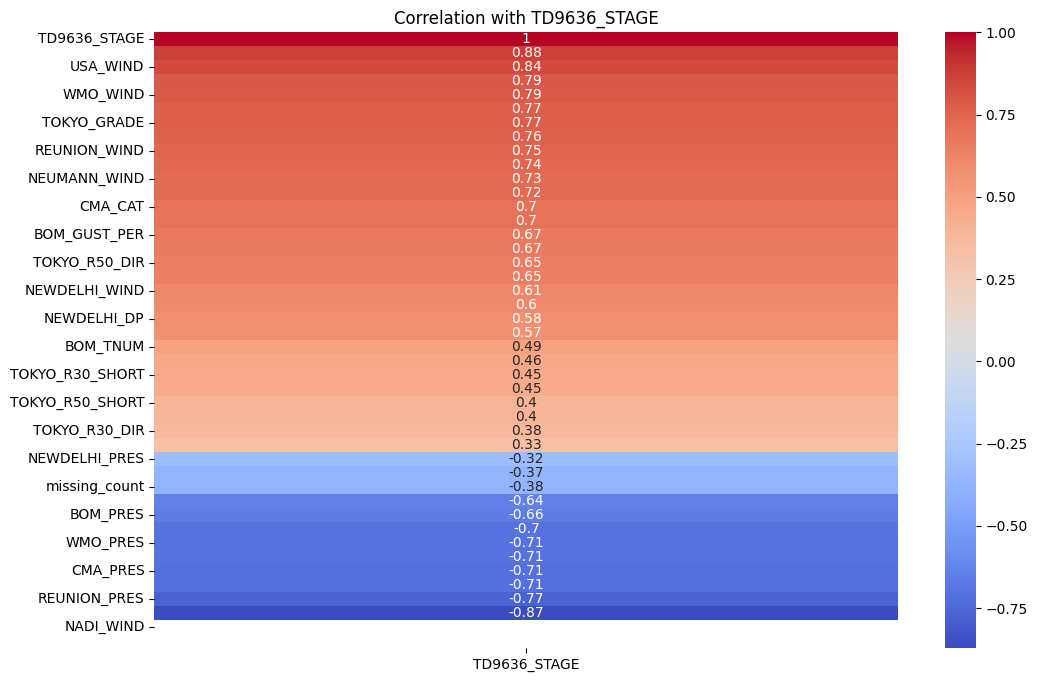

In [46]:
matr_corr=df_le.corr()
target_corr = matr_corr[['TD9636_STAGE']].sort_values(by='TD9636_STAGE', ascending=False)
plt.figure(figsize=(12, 8))
sns.heatmap(target_corr, cmap='coolwarm', annot=True)
plt.title("Correlation with TD9636_STAGE")
plt.show()

In [49]:
df_le

NATURE  WMO_WIND  WMO_PRES  USA_WIND  USA_PRES  USA_SSHS  TOKYO_GRADE  \
1            5       NaN       NaN      25.0       NaN        -1          NaN   
2            5       NaN       NaN      25.0       NaN        -1          NaN   
3            5       NaN       NaN      25.0       NaN        -1          NaN   
4            5       NaN       NaN      25.0       NaN        -1          NaN   
5            5       NaN       NaN      25.0       NaN        -1          NaN   
...        ...       ...       ...       ...       ...       ...          ...   
297094       3       NaN       NaN      35.0     988.0         0          NaN   
297095       3       NaN       NaN      35.0     991.0         0          NaN   
297096       3       NaN       NaN      35.0     993.0         0          NaN   
297097       3       NaN       NaN      37.0     991.0         0          NaN   
297098       3       NaN       NaN      39.0     989.0         0          NaN   

        TOKYO_WIND  TOKYO_PRES  TOKYO_R50_DIR  ...  NADI_PRES  \
1              NaN         NaN            NaN  ...        NaN   
2              NaN         NaN            NaN  ...        NaN   
3              NaN         NaN            NaN  ...        NaN   
4              NaN         NaN            NaN  ...        NaN   
5              NaN         NaN            NaN  ...        NaN   
...            ...         ...            ...  ...        ...   
297094         NaN         NaN            NaN  ...        NaN   
297095         NaN         NaN            NaN  ...        NaN   
297096         NaN         NaN            NaN  ...        NaN   
297097         NaN         NaN            NaN  ...        NaN   
297098         NaN         NaN            NaN  ...        NaN   

        WELLINGTON_WIND  WELLINGTON_PRES  TD9636_STAGE  TD9636_WIND  \
1                   NaN              NaN           1.0         25.0   
2                   NaN              NaN           1.0          NaN   
3                   NaN              NaN           1.0          NaN   
4                   NaN              NaN           1.0          NaN   
5                   NaN              NaN           1.0          NaN   
...                 ...              ...           ...          ...   
297094              NaN              NaN           NaN          NaN   
297095              NaN              NaN           NaN          NaN   
297096              NaN              NaN           NaN          NaN   
297097              NaN              NaN           NaN          NaN   
297098              NaN              NaN           NaN          NaN   

        NEUMANN_WIND  NEUMANN_PRES  BOM_GUST  BOM_GUST_PER  missing_count  
1               25.0           NaN       NaN           NaN             36  
2               25.0           NaN       NaN           NaN             37  
3               25.0           NaN       NaN           NaN             37  
4               25.0           NaN       NaN           NaN             37  
5               25.0           NaN       NaN           NaN             37  
...              ...           ...       ...           ...            ...  
297094           NaN           NaN       NaN           NaN             38  
297095           NaN           NaN       NaN           NaN             38  
297096           NaN           NaN       NaN           NaN             38  
297097           NaN           NaN       NaN           NaN             38  
297098           NaN           NaN       NaN           NaN             38  

[295207 rows x 44 columns]

## Let's take a look at the situation:
**🔹TD9636_STAGE is the target metric,with missing values**
-> As this is the target variable of our model (the one we want to predict), we need to be very careful about how we treat these NaNs.
If we fill in these values naively (e.g.: mean or median), we run the risk of introducing biases that will distort the model. If we delete them all, we lose too much data, which could degrade the model's performance+ we saw that we can't keep only the rows with available values because too old.

**🔹NATURE and TD9636_WIND are non-regional metrics, with missing values.**
-> need an imputation

**🔹The other columns are regional metrics, with missing values.**
-> need an imputation but only if the columns belongs to the region of the storm concerned

## It the Feature Engineering Phase...

### Here's the action plan would be
*1.Managing the missing values of the target, TD9636_STAGE*

*2. Imputing the non-regional metrics*

*3. Managing the regional metrics*
- Create a new column for each variable type (wind, pressure, etc.)
- Fill these new columns with the value of the corresponding region
- Delete regional columns after grouping

## Conlusion to this trial: not sure it would be an viable dataset,because of many transformation, especially on the target feature.